In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [17]:
tickers = pd.read_html("https://finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI")[0]

In [18]:
tickers

,Symbol,Company Name,Last Price,Change,% Change,Volume
0,HEROMOTOCO.NS,Hero MotoCorp Limited,2991.55,0.25,+0.01%,1077134.0
1,MARUTI.NS,Maruti Suzuki India Limited,6970.00,1.10,+0.02%,393474.0
2,BRITANNIA.NS,Britannia Industries Limited,3423.45,8.80,+0.26%,249490.0
3,LT.NS,Larsen & Toubro Limited,1478.10,-4.75,-0.32%,2310428.0
4,WIPRO.NS,Wipro Limited,538.70,-2.20,-0.41%,5876729.0
5,ONGC.NS,Oil and Natural Gas Corporation Limited,112.35,0.50,+0.45%,19319627.0
6,HINDALCO.NS,Hindalco Industries Limited,387.75,1.90,+0.49%,14853919.0
7,TATASTEEL.NS,Tata Steel Limited,1103.50,6.85,+0.62%,19204761.0
8,TECHM.NS,Tech Mahindra Limited,1026.25,6.45,+0.63%,1837477.0
9,BHARTIARTL.NS,Bharti Airtel Limited,523.60,3.80,+0.73%,10057471.0


In [19]:
tickers = tickers.Symbol.to_list()

In [20]:
tickers

['HEROMOTOCO.NS',
 'MARUTI.NS',
 'BRITANNIA.NS',
 'LT.NS',
 'WIPRO.NS',
 'ONGC.NS',
 'HINDALCO.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'BHARTIARTL.NS',
 'HDFCLIFE.NS',
 'ITC.NS',
 'CIPLA.NS',
 'TATACONSUM.NS',
 'TITAN.NS',
 'BAJAJ-AUTO.NS',
 'ULTRACEMCO.NS',
 'TCS.NS',
 'NTPC.NS',
 'INDUSINDBK.NS',
 'BAJFINANCE.NS',
 'KOTAKBANK.NS',
 'NESTLEIND.NS',
 'ICICIBANK.NS',
 'SHREECEM.NS',
 'BAJAJFINSV.NS',
 'COALINDIA.NS',
 'GRASIM.NS',
 'MM.NS',
 'RELIANCE.NS']

In [23]:
def RSIcalc(asset):
    df = yf.download(asset,start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg Up']/df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df
    

In [36]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df) - 11):
        if "Yes" in df["Buy"].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j+1].name)
    return Buying_dates,Selling_dates

In [28]:
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

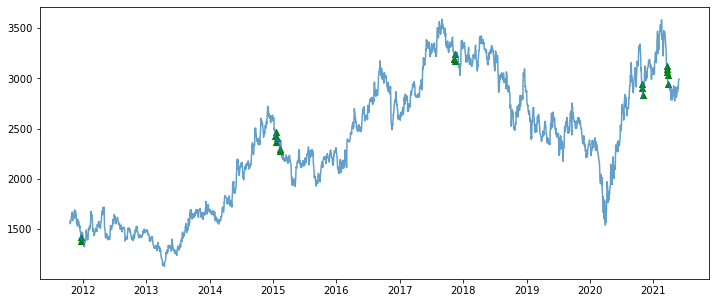

In [30]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index,frame.loc[buy]['Adj Close'], marker= '^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [31]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [32]:
Profits

array([ 0.00678143,  0.06453392, -0.01684428, -0.01784012,  0.00963288,
        0.01893156,  0.03955798,  0.03703696,  0.00620176,  0.01262136,
        0.00316021,  0.01972125,  0.00512821, -0.01836394,  0.01800554,
       -0.05996759, -0.08034235, -0.04469253, -0.04563233, -0.05245461])

In [33]:
wins = [ i for i in Profits if i > 0]

In [34]:
len(wins)/len(Profits)

0.6

In [35]:
len(Profits)

20

In [37]:
matrixsignals = []
matrixprofits = []

for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy,sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed


<ipython-input-23-3b66e39c3e93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up']/df['avg Down']
<ipython-input-23-3b66e39c3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/Users/karan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MM.NS: No data found, symbol may be delisted


ValueError: cannot set a frame with no defined index and a scalar

In [39]:
len(matrixprofits)

28

In [41]:
allprofit = []

for i in matrixprofits:
    for e in i:
        allprofit.append(e)

In [42]:
wins = [i for i in allprofit if i > 0]

In [43]:
len(wins)/len(allprofit)

0.7030625832223701

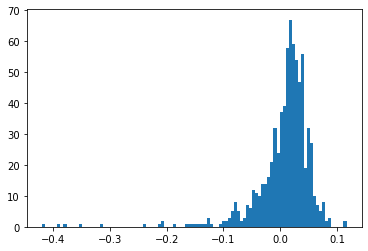

In [44]:
plt.hist(allprofit,bins=100)
plt.show()

In [45]:
for i in matrixsignals:
    for e in i: 
        if e.year ==2021:
            print(e)

2021-03-19 00:00:00
2021-03-22 00:00:00
2021-03-23 00:00:00
2021-03-24 00:00:00
2021-03-25 00:00:00
2021-02-01 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-03-01 00:00:00
2021-01-07 00:00:00
2021-03-25 00:00:00
2021-03-26 00:00:00
2021-04-20 00:00:00
2021-04-13 00:00:00
2021-02-01 00:00:00
2021-03-02 00:00:00
2021-05-05 00:00:00
2021-03-19 00:00:00
2021-02-23 00:00:00
2021-05-05 00:00:00
2021-03-01 00:00:00
2021-03-16 00:00:00
2021-03-17 00:00:00
2021-03-18 00:00:00
2021-03-26 00:00:00
2021-02-23 00:00:00
2021-02-25 00:00:00
2021-03-01 00:00:00
2021-01-28 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-04-13 00:00:00
2021-04-20 00:00:00
2021-01-19 00:00:00
2021-04-13 00:00:00
2021-04-20 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-02-01 00:00:00
2021-03-26 00:00:00
2021-04-01 00:00:00
2021-02-01 00:00:00
2021-02-02 00:00:00
2021-01-19 00:00:00
2021-03-25 00:00:00
2021-03-26 00:00:00
2021-01-29 00:00:00
